In [2]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

```
-- This query does a table JOIN between the imaging (PhotoObj) and spectra
-- (SpecObj) tables and includes the necessary columns in the SELECT to upload
-- the results to the SAS (Science Archive Server) for FITS file retrieval.
SELECT 
   p.objid,p.ra,p.dec,p.u,p.g,p.r,p.i,p.z,
   s.specobjid, s.class, s.z as redshift,
   s.plate, s.mjd, s.fiberid
FROM PhotoObj AS p
   JOIN SpecObj AS s ON s.bestobjid = p.objid
WHERE 
   p.u BETWEEN 0 AND 19.0
   AND g BETWEEN 0 AND 20.0
```


In [24]:
data = Table.read("Skyserver_SQL3_6_2019 11_13_20 PM.fits")
print(len(data[data['class']=='QSO']))
print(len(data[data['class']=='GALAXY']))
ii_qso = data['class']=='QSO'
ii_gal = data['class']=='GALAXY'

30387
191681


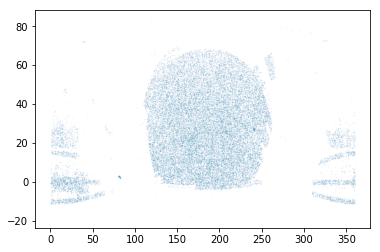

In [26]:
plt.scatter(data['ra'][ii_qso], data['dec'][ii_qso], alpha=0.1, s=0.1)

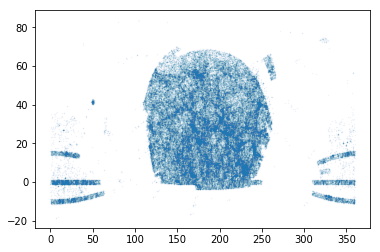

In [31]:
near = data['redshift']<0.08
plt.scatter(data['ra'][ii_gal&near], data['dec'][ii_gal&near], alpha=0.1, s=0.1)

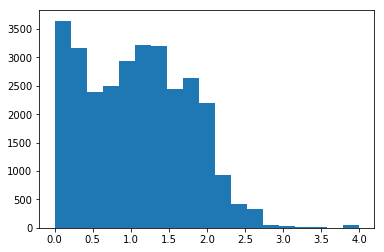

In [23]:
_=plt.hist(data['redshift'][(ii_qso) & ], bins=np.linspace(0, 4.0, 20))

In [10]:
data

objid,ra,dec,u,g,r,i,z,specobjid,class,redshift,plate,mjd,fiberid
int64,float64,float64,float32,float32,float32,float32,float32,bytes25,bytes32,float32,int16,int32,int16
1237648721216995346,148.59068901832194,-0.031106032951539735,18.94518,18.693567,18.697247,18.829351,18.764795,301828063849637888,QSO,0.740679,268,51633,316
1237648721217192105,149.10807349926625,-0.06473541567867284,18.89431,18.543802,18.677513,18.438913,18.355558,300636742581512192,QSO,0.5121477,267,51608,78
1237648721217913004,150.64773001037022,-0.06760663410192357,18.555712,17.59396,17.312748,17.116098,16.966002,302942148653770752,GALAXY,0.034375746,269,51910,273
1237648721217847440,150.54141867827423,-0.18922735514984387,18.141748,17.056503,16.624405,16.334934,16.11714,302953418647955456,GALAXY,0.044709425,269,51910,314
1237648721217847321,150.53210299306966,-0.18798649732220266,18.647028,16.682138,15.925127,15.653576,15.51367,3211098495112996864,STAR,0.00015698232,2852,54468,116
1237648721217847309,150.50067831771963,-0.07759888662262171,16.611229,15.563513,15.251288,15.1391535,15.112145,3211110314862995456,STAR,-2.1150468e-05,2852,54468,159
1237648721217782054,150.49027620547673,-0.1170947805049589,18.944033,17.45961,16.780613,16.41189,16.119017,301750273401972736,GALAXY,0.032908417,268,51633,33
1237648721217781939,150.3817821095223,-0.17423776031247024,18.892376,17.470352,16.741112,16.364372,16.091665,302954518159583232,GALAXY,0.10597896,269,51910,318
1237648721217781912,150.3674766657049,-0.12577571834821843,18.240662,17.00006,16.430883,16.089174,15.887402,302952868892141568,GALAXY,0.092145465,269,51910,312
